In [64]:
import pandas as pd
import numpy as np

from dateutil.parser import parse
from datetime import datetime
import dateutil.parser

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import glob
import os
import zipfile

import timeit
import requests

from bs4 import BeautifulSoup
import re
import urllib
from bs4 import BeautifulSoup, element

import nltk

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

import statsmodels.api as sm


## Web Scraping Game Ranking 2018

In [2]:
# bring in vg chart data from url
url = 'http://www.vgchartz.com/yearly/2018/Global/'

response = requests.get(url)

In [3]:
# make sure the site is responsive 
response.status_code

200

In [4]:
tables = pd.read_html(url)

In [5]:
# print out table from site using pandas
tables[1]

,Pos,Game,Game.1,Game.2,Weeks,Yearly,Total
0,1,Red Dead Redemption 2 (PS4)Take-Two Interactiv...,Red Dead Redemption 2 (PS4)Take-Two Interactiv...,Red Dead Redemption 2 (PS4)Take-Two Interactiv...,10,13940203,13940203
1,2,"Call of Duty: Black Ops IIII (PS4)Activision, ...","Call of Duty: Black Ops IIII (PS4)Activision, ...","Call of Duty: Black Ops IIII (PS4)Activision, ...",12,9317241,9317241
2,3,"FIFA 19 (PS4)Electronic Arts, Sports","FIFA 19 (PS4)Electronic Arts, Sports","FIFA 19 (PS4)Electronic Arts, Sports",14,9147505,9147505
3,4,"Super Smash Bros. (2018) (NS)Nintendo, Fighting","Super Smash Bros. (2018) (NS)Nintendo, Fighting","Super Smash Bros. (2018) (NS)Nintendo, Fighting",4,8951009,8951009
4,5,Spider-Man (PS4) (PS4)Sony Interactive Enterta...,Spider-Man (PS4) (PS4)Sony Interactive Enterta...,Spider-Man (PS4) (PS4)Sony Interactive Enterta...,17,8757859,8757859
5,6,"Mario Kart 8 Deluxe (NS)Nintendo, Racing","Mario Kart 8 Deluxe (NS)Nintendo, Racing","Mario Kart 8 Deluxe (NS)Nintendo, Racing",88,6688249,13046117
6,7,God of War (PS4) (PS4)Sony Interactive Enterta...,God of War (PS4) (PS4)Sony Interactive Enterta...,God of War (PS4) (PS4)Sony Interactive Enterta...,37,6153527,6153527
7,8,Red Dead Redemption 2 (XOne)Take-Two Interacti...,Red Dead Redemption 2 (XOne)Take-Two Interacti...,Red Dead Redemption 2 (XOne)Take-Two Interacti...,10,5771147,5771147
8,9,"Super Mario Party (NS)Nintendo, Party","Super Mario Party (NS)Nintendo, Party","Super Mario Party (NS)Nintendo, Party",13,4972711,4972711
9,10,"Call of Duty: Black Ops IIII (XOne)Activision,...","Call of Duty: Black Ops IIII (XOne)Activision,...","Call of Duty: Black Ops IIII (XOne)Activision,...",12,4850704,4850704


In [6]:
# convert list object to a dataframe 
sales_df = pd.DataFrame(tables[1])

In [7]:
sales_df.head()

,Pos,Game,Game.1,Game.2,Weeks,Yearly,Total
0,1,Red Dead Redemption 2 (PS4)Take-Two Interactiv...,Red Dead Redemption 2 (PS4)Take-Two Interactiv...,Red Dead Redemption 2 (PS4)Take-Two Interactiv...,10,13940203,13940203
1,2,"Call of Duty: Black Ops IIII (PS4)Activision, ...","Call of Duty: Black Ops IIII (PS4)Activision, ...","Call of Duty: Black Ops IIII (PS4)Activision, ...",12,9317241,9317241
2,3,"FIFA 19 (PS4)Electronic Arts, Sports","FIFA 19 (PS4)Electronic Arts, Sports","FIFA 19 (PS4)Electronic Arts, Sports",14,9147505,9147505
3,4,"Super Smash Bros. (2018) (NS)Nintendo, Fighting","Super Smash Bros. (2018) (NS)Nintendo, Fighting","Super Smash Bros. (2018) (NS)Nintendo, Fighting",4,8951009,8951009
4,5,Spider-Man (PS4) (PS4)Sony Interactive Enterta...,Spider-Man (PS4) (PS4)Sony Interactive Enterta...,Spider-Man (PS4) (PS4)Sony Interactive Enterta...,17,8757859,8757859


In [8]:
# take out columns that are not needed for analysis
columns = ['Pos', 'Game.1', 'Game.2']
sales_df = sales_df.drop(columns, axis=1)

In [9]:
sales_df

,Game,Weeks,Yearly,Total
0,Red Dead Redemption 2 (PS4)Take-Two Interactiv...,10,13940203,13940203
1,"Call of Duty: Black Ops IIII (PS4)Activision, ...",12,9317241,9317241
2,"FIFA 19 (PS4)Electronic Arts, Sports",14,9147505,9147505
3,"Super Smash Bros. (2018) (NS)Nintendo, Fighting",4,8951009,8951009
4,Spider-Man (PS4) (PS4)Sony Interactive Enterta...,17,8757859,8757859
5,"Mario Kart 8 Deluxe (NS)Nintendo, Racing",88,6688249,13046117
6,God of War (PS4) (PS4)Sony Interactive Enterta...,37,6153527,6153527
7,Red Dead Redemption 2 (XOne)Take-Two Interacti...,10,5771147,5771147
8,"Super Mario Party (NS)Nintendo, Party",13,4972711,4972711
9,"Call of Duty: Black Ops IIII (XOne)Activision,...",12,4850704,4850704


In [10]:
def game_title(game):
    return game.split('(')[0].strip()

In [11]:
# Apply a function to format game title 
sales_df['Game'] = sales_df['Game'].apply(game_title)

In [12]:
sales_df.head()

,Game,Weeks,Yearly,Total
0,Red Dead Redemption 2,10,13940203,13940203
1,Call of Duty: Black Ops IIII,12,9317241,9317241
2,FIFA 19,14,9147505,9147505
3,Super Smash Bros.,4,8951009,8951009
4,Spider-Man,17,8757859,8757859


In [13]:
# lower case the game rows so that they are compatible with Twitch dataframe
sales_df['Game'] = sales_df['Game'].str.lower()

In [14]:
sales_df.head()

,Game,Weeks,Yearly,Total
0,red dead redemption 2,10,13940203,13940203
1,call of duty: black ops iiii,12,9317241,9317241
2,fifa 19,14,9147505,9147505
3,super smash bros.,4,8951009,8951009
4,spider-man,17,8757859,8757859


In [15]:
# format columns in lowercase
sales_df.columns = [x.lower() for x in sales_df.columns]


In [16]:
sales_df.head(10)

,game,weeks,yearly,total
0,red dead redemption 2,10,13940203,13940203
1,call of duty: black ops iiii,12,9317241,9317241
2,fifa 19,14,9147505,9147505
3,super smash bros.,4,8951009,8951009
4,spider-man,17,8757859,8757859
5,mario kart 8 deluxe,88,6688249,13046117
6,god of war,37,6153527,6153527
7,red dead redemption 2,10,5771147,5771147
8,super mario party,13,4972711,4972711
9,call of duty: black ops iiii,12,4850704,4850704


In [17]:
# group by game title to sum unit sales per game (currently broken down by platform)
sales_df = sales_df.groupby(['game'])['yearly'].sum().reset_index()


In [18]:
sales_df.head(79)

,game,yearly
0,1-2-switch,888949
1,assassin's creed odyssey,4564139
2,assassin's creed origins,1492024
3,astro bot rescue mission,713531
4,battlefield v,3771595
5,bayonetta 2,573643
6,call of duty: black ops iiii,14167945
7,call of duty: wwii,2526194
8,captain toad: treasure tracker,848254
9,crash bandicoot n. sane trilogy,2326726


## Web Scraping Game Ranking 2017

In [19]:
# bring in vg chart data from url
url2 = 'http://www.vgchartz.com/yearly/2017/Global/'

response2 = requests.get(url2)

In [20]:
tables2 = pd.read_html(url2)

In [21]:
tables2[1]

,Pos,Game,Game.1,Game.2,Weeks,Yearly,Total
0,1,"Call of Duty: WWII (PS4)Activision, Shooter","Call of Duty: WWII (PS4)Activision, Shooter","Call of Duty: WWII (PS4)Activision, Shooter",9,11665414,11665414
1,2,"FIFA 18 (PS4)Electronic Arts, Sports","FIFA 18 (PS4)Electronic Arts, Sports","FIFA 18 (PS4)Electronic Arts, Sports",14,10107910,10107910
2,3,"Super Mario Odyssey (NS)Nintendo, Platform","Super Mario Odyssey (NS)Nintendo, Platform","Super Mario Odyssey (NS)Nintendo, Platform",10,7715648,7715648
3,4,"Mario Kart 8 Deluxe (NS)Nintendo, Racing","Mario Kart 8 Deluxe (NS)Nintendo, Racing","Mario Kart 8 Deluxe (NS)Nintendo, Racing",36,6357868,6357868
4,5,The Legend of Zelda: Breath of the Wild (NS)Ni...,The Legend of Zelda: Breath of the Wild (NS)Ni...,The Legend of Zelda: Breath of the Wild (NS)Ni...,44,6073816,6073816
5,6,"Call of Duty: WWII (XOne)Activision, Shooter","Call of Duty: WWII (XOne)Activision, Shooter","Call of Duty: WWII (XOne)Activision, Shooter",9,5440378,5440378
6,7,Pokemon: Ultra Sun and Ultra Moon (3DS)Nintend...,Pokemon: Ultra Sun and Ultra Moon (3DS)Nintend...,Pokemon: Ultra Sun and Ultra Moon (3DS)Nintend...,7,5308897,5308897
7,8,Horizon: Zero Dawn (PS4)Sony Interactive Enter...,Horizon: Zero Dawn (PS4)Sony Interactive Enter...,Horizon: Zero Dawn (PS4)Sony Interactive Enter...,44,4507665,4507665
8,9,"Splatoon 2 (NS)Nintendo, Shooter","Splatoon 2 (NS)Nintendo, Shooter","Splatoon 2 (NS)Nintendo, Shooter",24,4104949,4104949
9,10,Crash Bandicoot N. Sane Trilogy (PS4)Activisio...,Crash Bandicoot N. Sane Trilogy (PS4)Activisio...,Crash Bandicoot N. Sane Trilogy (PS4)Activisio...,27,3615050,3615050


In [22]:
# convert list object to a dataframe 
sales_df2 = pd.DataFrame(tables2[1])

In [23]:
# take out columns that are not needed for analysis
columns = ['Pos', 'Game.1', 'Game.2']
sales_df2 = sales_df2.drop(columns, axis=1)

In [24]:
# Apply a function to format game title 
sales_df2['Game'] = sales_df2['Game'].apply(game_title)

In [25]:
# lower case the game rows so that they are compatible with Twitch dataframe
sales_df2['Game'] = sales_df2['Game'].str.lower()

In [26]:
# format columns in lowercase
sales_df2.columns = [x.lower() for x in sales_df2.columns]

In [27]:
# group by game title to sum unit sales per game (currently broken down by platform)
sales_df2 = sales_df2.groupby(['game'])['yearly'].sum().reset_index()

In [28]:
sales_df2

,game,yearly
0,1-2-switch,1574025
1,animal crossing: new leaf,691195
2,arms,1441461
3,assassin's creed origins,5045912
4,battlefield 1,2010971
5,call of duty: infinite warfare,2688555
6,call of duty: wwii,17105792
7,crash bandicoot n. sane trilogy,3615050
8,destiny 2,5217280
9,doom,625323


## Web Scraping Game Ranking 2016

In [29]:
# bring in vg chart data from url
url3 = 'http://www.vgchartz.com/yearly/2016/Global/'

response3 = requests.get(url3)

In [30]:
tables3 = pd.read_html(url3)

In [31]:
tables3[1]

,Pos,Game,Game.1,Game.2,Weeks,Yearly,Total
0,1,"Pokemon Sun/Moon (3DS)Nintendo, Role-Playing","Pokemon Sun/Moon (3DS)Nintendo, Role-Playing","Pokemon Sun/Moon (3DS)Nintendo, Role-Playing",7,12034530,12034530
1,2,"FIFA 17 (PS4)Electronic Arts, Sports","FIFA 17 (PS4)Electronic Arts, Sports","FIFA 17 (PS4)Electronic Arts, Sports",14,9581584,9581584
2,3,Uncharted (PS4) (PS4)Sony Computer Entertainme...,Uncharted (PS4) (PS4)Sony Computer Entertainme...,Uncharted (PS4) (PS4)Sony Computer Entertainme...,34,8298741,8298741
3,4,Call of Duty: Infinite Warfare (PS4)Activision...,Call of Duty: Infinite Warfare (PS4)Activision...,Call of Duty: Infinite Warfare (PS4)Activision...,9,6195297,6195297
4,5,"Battlefield 1 (PS4)Electronic Arts, Shooter","Battlefield 1 (PS4)Electronic Arts, Shooter","Battlefield 1 (PS4)Electronic Arts, Shooter",11,5961774,5961774
5,6,"Battlefield 1 (XOne)Electronic Arts, Shooter","Battlefield 1 (XOne)Electronic Arts, Shooter","Battlefield 1 (XOne)Electronic Arts, Shooter",11,4219657,4219657
6,7,"Grand Theft Auto V (PS4)Take-Two Interactive, ...","Grand Theft Auto V (PS4)Take-Two Interactive, ...","Grand Theft Auto V (PS4)Take-Two Interactive, ...",111,4104297,13637345
7,8,"Call of Duty: Black Ops 3 (PS4)Activision, Sho...","Call of Duty: Black Ops 3 (PS4)Activision, Sho...","Call of Duty: Black Ops 3 (PS4)Activision, Sho...",61,4035701,14494243
8,9,"Tom Clancy's The Division (PS4)Ubisoft, Misc","Tom Clancy's The Division (PS4)Ubisoft, Misc","Tom Clancy's The Division (PS4)Ubisoft, Misc",43,4029849,4029849
9,10,"Final Fantasy XV (PS4)Square Enix, Role-Playing","Final Fantasy XV (PS4)Square Enix, Role-Playing","Final Fantasy XV (PS4)Square Enix, Role-Playing",5,3917803,3917803


In [32]:
# convert list object to a dataframe 
sales_df3 = pd.DataFrame(tables3[1])

In [33]:
# take out columns that are not needed for analysis
columns = ['Pos', 'Game.1', 'Game.2']
sales_df3 = sales_df3.drop(columns, axis=1)

In [34]:
# Apply a function to format game title 
sales_df3['Game'] = sales_df3['Game'].apply(game_title)

In [35]:
# lower case the game rows so that they are compatible with Twitch dataframe
sales_df3['Game'] = sales_df3['Game'].str.lower()

In [36]:
# format columns in lowercase
sales_df3.columns = [x.lower() for x in sales_df3.columns]

In [37]:
# group by game title to sum unit sales per game (currently broken down by platform)
sales_df3 = sales_df3.groupby(['game'])['yearly'].sum().reset_index()

In [38]:
sales_df3

,game,yearly
0,animal crossing: new leaf,852589
1,assassin's creed syndicate,743880
2,batman: arkham knight,770709
3,battlefield 1,10181431
4,call of duty: black ops 3,5454752
5,call of duty: infinite warfare,10064882
6,dark souls iii,1778568
7,dishonored 2,1319229
8,doom,2798222
9,dragon ball: xenoverse 2,916289


## Combining the 3 years

In [39]:
combined_charts = pd.concat([sales_df, sales_df2, sales_df3], axis=0)

In [40]:
combined_charts

,game,yearly
0,1-2-switch,888949
1,assassin's creed odyssey,4564139
2,assassin's creed origins,1492024
3,astro bot rescue mission,713531
4,battlefield v,3771595
5,bayonetta 2,573643
6,call of duty: black ops iiii,14167945
7,call of duty: wwii,2526194
8,captain toad: treasure tracker,848254
9,crash bandicoot n. sane trilogy,2326726


In [41]:
# group by game title to sum unit sales per game (currently broken down by platform)
combined_charts = combined_charts.groupby(['game'])['yearly'].sum().reset_index()

In [42]:
combined_charts

,game,yearly
0,1-2-switch,2462974
1,animal crossing: new leaf,1543784
2,arms,1441461
3,assassin's creed odyssey,4564139
4,assassin's creed origins,6537936
5,assassin's creed syndicate,743880
6,astro bot rescue mission,713531
7,batman: arkham knight,770709
8,battlefield 1,12192402
9,battlefield v,3771595


## Read in Twitch Data

In [43]:
# read in all twitch data
twitch_df = pd.read_csv("twitch_final.csv")

In [44]:
twitch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
Average channels        3000 non-null int64
Average viewer ratio    3000 non-null float64
Average viewers         3000 non-null int64
Followers gained        3000 non-null int64
Game                    3000 non-null object
Peak channels           3000 non-null int64
Peak viewers            3000 non-null int64
Stream time             3000 non-null int64
Streamers               3000 non-null int64
Unnamed: 0              2000 non-null object
Unnamed: 1              2000 non-null float64
Unnamed: 13             2000 non-null object
Views gained            3000 non-null int64
Watch time              3000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 328.2+ KB


In [45]:
# format columns 
twitch_df.rename(columns = {
    'Game': 'game',
    'Watch time': 'watch_time',
    'Stream time': 'stream_time',
    'Peak viewers': 'peak_viewers',
    'Peak channels': 'peak_channels',
    'Streamers': 'streamers',
    'Average viewers': 'average_viewers',
    'Average channels': 'average_channels',
    'Average viewer ratio': 'average_viewer_ratio',
    'Followers gained': 'followers_gained',
    'Views gained': 'views_gained'},
    inplace = True)

In [46]:
twitch_df = twitch_df.drop(['followers_gained', 'Unnamed: 1', 'Unnamed: 0', 'Unnamed: 13', 'views_gained'], axis=1)


In [51]:
twitch_df.head()

,average_channels,average_viewer_ratio,average_viewers,game,peak_channels,peak_viewers,stream_time,streamers,watch_time
0,0,1047.29,34,Kirby: Squeak Squad,16,156564,17400,78,18222840
1,0,86.54,34,GeoGuessr,5,18607,208980,703,18085380
2,0,42.50,34,Silent Hill,11,12977,422520,1068,17959140
3,1,25.70,33,Reign Of Kings,14,28846,695700,1903,17881860
4,2,15.74,33,Revelation Online,93,3179,1135680,2096,17870760


In [52]:
# lower-case the game column for integration into sales_df
twitch_df['game'] = twitch_df['game'].str.lower()

In [55]:
twitch_sum = twitch_df.groupby(['game'])['stream_time', 'watch_time'].sum().reset_index()

In [56]:
twitch_sum

,game,stream_time,watch_time
0,60 parsecs!,178560,45533460
1,60 seconds!,1194300,224962380
2,7 days to die,121328460,1310570100
3,"999: 9 hours, 9 persons, 9 doors",277080,25708620
4,a hat in time,6319740,120114120
5,a way out,11409300,433136340
6,absolver,2478660,67610220
7,abzû,506760,23475300
8,adr1ft,181800,10870440
9,agar.io,7113180,80340720


In [57]:
combined_df = pd.merge(combined_charts, twitch_sum, on='game')

In [58]:
combined_df

,game,yearly,stream_time,watch_time
0,animal crossing: new leaf,1543784,1846260,70368600
1,arms,1441461,1168200,46703460
2,assassin's creed odyssey,4564139,23675880,906306720
3,assassin's creed origins,6537936,24301200,507924360
4,assassin's creed syndicate,743880,7462860,29936820
5,batman: arkham knight,770709,17177160,72995880
6,battlefield 1,12192402,208699620,2147050440
7,battlefield v,3771595,37610460,1096354260
8,call of duty: infinite warfare,12753437,102333240,1598646900
9,call of duty: wwii,19631986,112395240,3244029960


In [66]:
combined_df2 = pd.merge(combined_charts, twitch_df, on='game')

In [67]:
combined_df2

,game,yearly,average_channels,average_viewer_ratio,average_viewers,peak_channels,peak_viewers,stream_time,streamers,watch_time
0,animal crossing: new leaf,1543784,1,24.72,29,10,12565,634020,720,15674400
1,animal crossing: new leaf,1543784,1,41.25,54,17,5829,696660,574,28733760
2,animal crossing: new leaf,1543784,0,50.35,49,16,13805,515580,444,25960440
3,arms,1441461,2,39.98,88,570,40901,1168200,3635,46703460
4,assassin's creed odyssey,4564139,45,38.28,1724,1221,105475,23675880,49923,906306720
5,assassin's creed origins,6537936,24,7.07,173,146,9910,12902040,51845,91219080
6,assassin's creed origins,6537936,21,36.56,792,755,80844,11399160,31322,416705280
7,assassin's creed syndicate,743880,7,4.22,33,37,5068,4201020,23125,17741040
8,assassin's creed syndicate,743880,6,3.74,23,27,5207,3261840,10912,12195780
9,batman: arkham knight,770709,7,4.08,31,31,5004,4109460,12528,16771800


## Plotting The Relationships

In [59]:
combined_df.shape

(119, 4)

In [60]:
combined_df.corr()

,yearly,stream_time,watch_time
yearly,1.000000,0.093823,0.115791
stream_time,0.093823,1.000000,0.966157
watch_time,0.115791,0.966157,1.000000


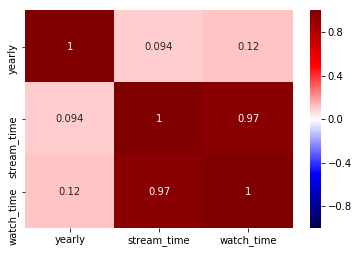

In [61]:
sns.heatmap(combined_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


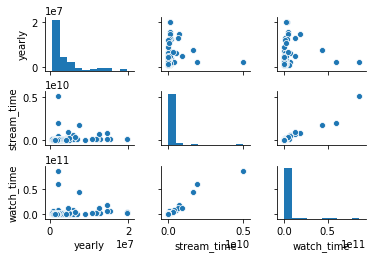

In [62]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(combined_df, height=1.2, aspect=1.5);

In [65]:
# Define the model
lm1 = smf.ols('yearly ~ watch_time + stream_time', data=combined_df)

# Fit the model
fit = lm1.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yearly   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.081
Date:                Mon, 15 Jul 2019   Prob (F-statistic):              0.343
Time:                        22:08:10   Log-Likelihood:                -1974.7
No. Observations:                 119   AIC:                             3955.
Df Residuals:                     116   BIC:                             3964.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.347e+06   3.75e+05      8.932      0.000     2.6e+06    4.09e+06
watch_time      0.0001      0.000      1.060      0.292      -0.000       0.000
stream_time    -0.0021      0.003     -0.761      0.448      -0.007       0.003
==============================================================================
Omnibus:                       66.865   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.794
Skew:                           2.183   Prob(JB):                     2.78e-46
Kurtosis:                       7.821   Cond. No.                     1.12e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
combined_df2.shape

(241, 10)

In [69]:
combined_df2.corr()

,yearly,average_channels,average_viewer_ratio,average_viewers,peak_channels,peak_viewers,stream_time,streamers,watch_time
yearly,1.000000,0.062436,-0.087189,0.084346,0.156609,0.149635,0.062460,0.164300,0.084404
average_channels,0.062436,1.000000,-0.050571,0.971768,0.866893,0.819266,1.000000,0.980901,0.971760
average_viewer_ratio,-0.087189,-0.050571,1.000000,-0.030120,-0.071328,0.043341,-0.050656,-0.080030,-0.030128
average_viewers,0.084346,0.971768,-0.030120,1.000000,0.832808,0.838108,0.971760,0.946491,1.000000
peak_channels,0.156609,0.866893,-0.071328,0.832808,1.000000,0.841400,0.866929,0.868091,0.832858
peak_viewers,0.149635,0.819266,0.043341,0.838108,0.841400,1.000000,0.819256,0.817761,0.838119
stream_time,0.062460,1.000000,-0.050656,0.971760,0.866929,0.819256,1.000000,0.980946,0.971753
streamers,0.164300,0.980901,-0.080030,0.946491,0.868091,0.817761,0.980946,1.000000,0.946520
watch_time,0.084404,0.971760,-0.030128,1.000000,0.832858,0.838119,0.971753,0.946520,1.000000


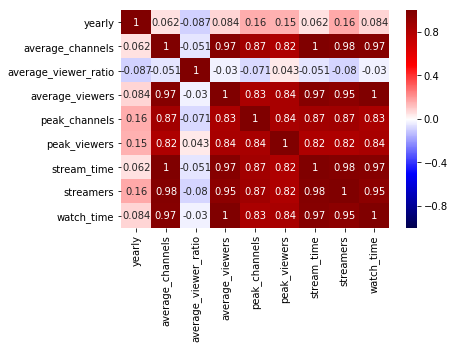

In [70]:
sns.heatmap(combined_df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


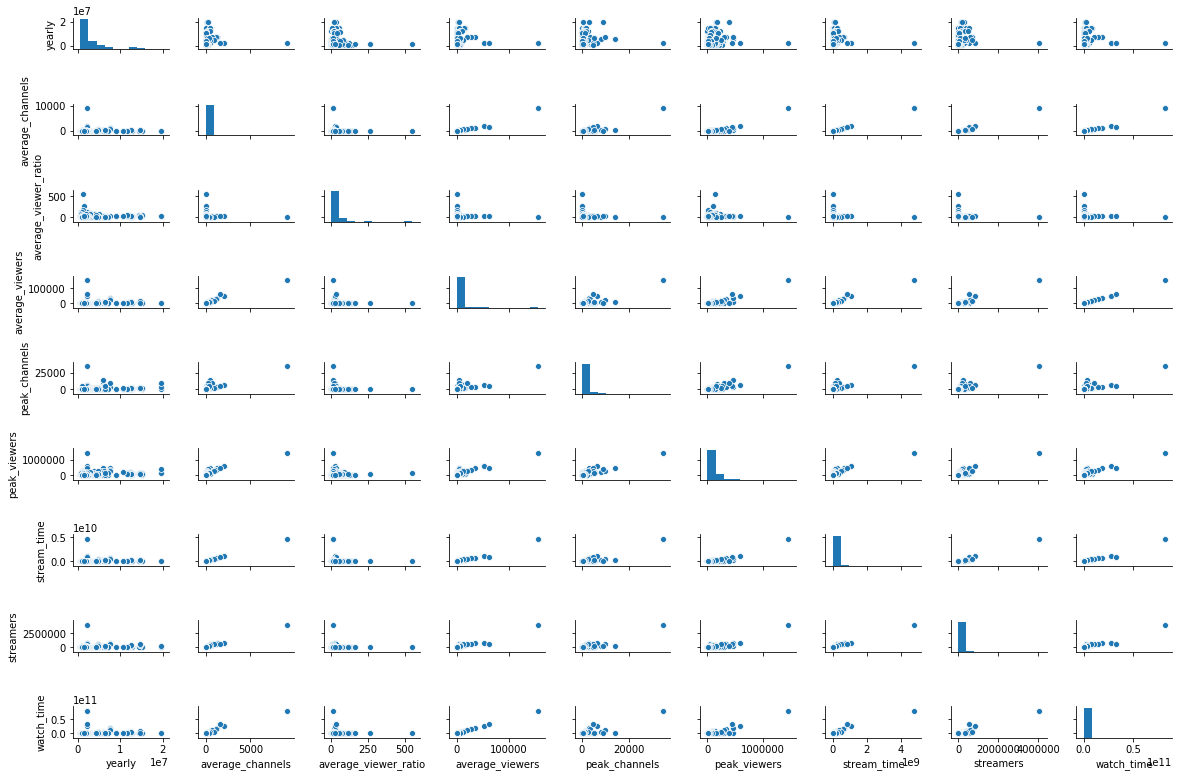

In [72]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(combined_df2, height=1.2, aspect=1.5);

In [77]:
# Define the model
lm1 = smf.ols('yearly ~ watch_time + stream_time + average_channels + average_viewers + peak_channels + peak_viewers + streamers', data=combined_df2)

# Fit the model
fit2 = lm1.fit()

# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yearly   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     20.96
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           8.47e-22
Time:                        23:38:46   Log-Likelihood:                -3946.2
No. Observations:                 241   AIC:                             7908.
Df Residuals:                     233   BIC:                             7936.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.126e+06   4.48e+05      6.985      0.000    2.24e+06    4.01e+06
watch_time          -0.2487      0.115     -2.168      0.031      -0.475      -0.023
stream_time         -3.6752      1.332     -2.760      0.006      -6.299      -1.051
average_channels  1.902e+06      7e+05      2.719      0.007    5.24e+05    3.28e+06
average_viewers   1.311e+05   6.03e+04      2.173      0.031    1.22e+04     2.5e+05
peak_channels      590.5371    186.353      3.169      0.002     223.385     957.690
peak_viewers        -4.1331      3.543     -1.167      0.245     -11.114       2.847
streamers           48.3570      4.416     10.951      0.000      39.657      57.057
==============================================================================
Omnibus:                       70.290   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.140
Skew:                           1.358   Prob(JB):                     8.38e-37
Kurtosis:                       6.029   Cond. No.                     2.42e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

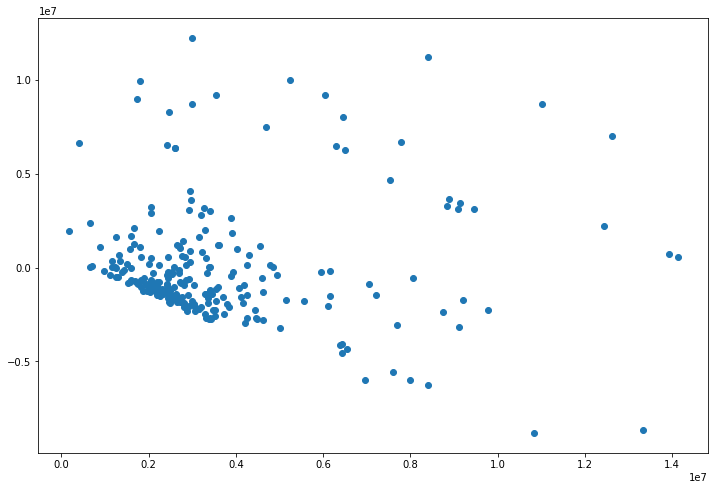

In [78]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(12,8))
plt.scatter(fit2.predict(), fit2.resid);